In [58]:
#importing libraries
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices

import numpy as np
%matplotlib inline

In [59]:
ibm_data=pd.read_csv('IBM Attrition Data.csv')

In [60]:
ibm_data.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [61]:
ibm_data.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


In [62]:
name=ibm_data.columns
name

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

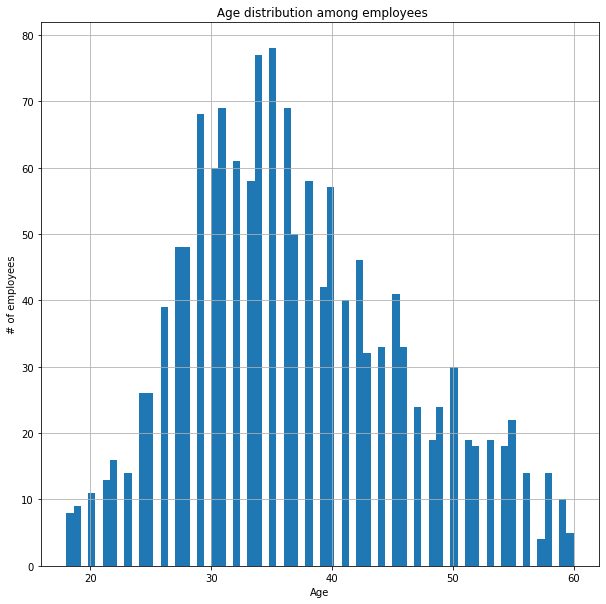

In [63]:
#histogram of age
plt.figure(figsize=(10,10))
ibm_data['Age'].hist(bins=70)
plt.xlabel('Age')
plt.ylabel('# of employees')
plt.title(' Age distribution among employees')
plt.show()

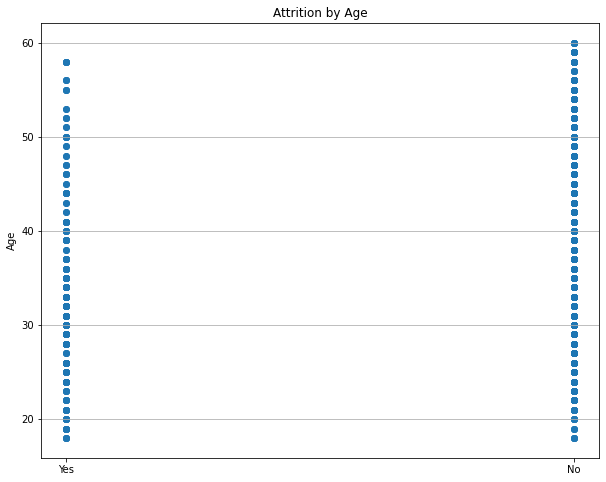

In [64]:
#attrition by age
plt.figure(figsize=(10,8))
plt.scatter(ibm_data.Attrition, ibm_data.Age, alpha=1)
plt.ylabel('Age')
plt.title('Attrition by Age')
plt.grid( b=True, which='major', axis='y')
plt.show()

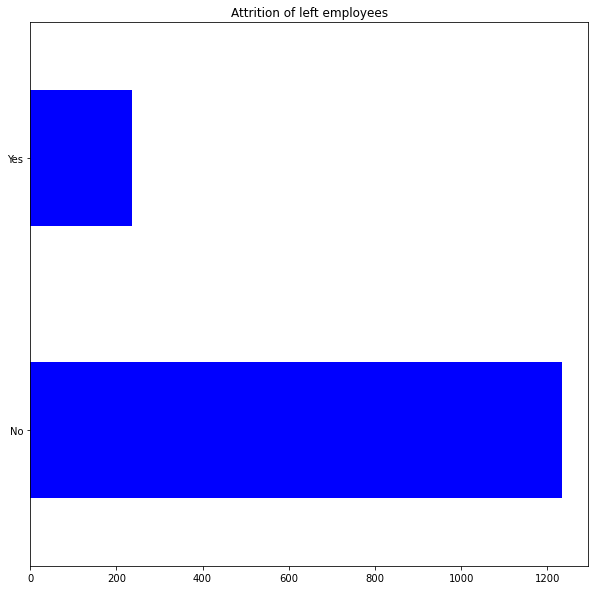

In [65]:
#explore data for left employees
plt.figure(figsize=(10,10))
ibm_data.Attrition.value_counts().plot(kind='barh', color='blue', alpha=1)
plt.title('Attrition of left employees')
plt.show()

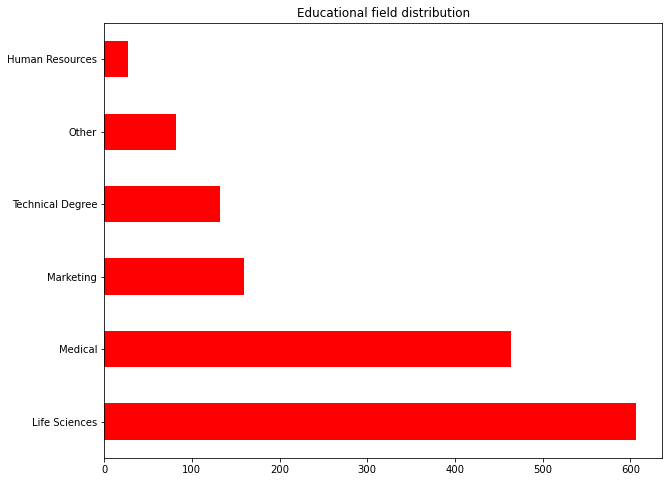

In [66]:
#explore data for the educational field distribution
plt.figure(figsize=(10,8))
ibm_data.EducationField.value_counts().plot(kind='barh', color='red', alpha=1)
plt.title('Educational field distribution')
plt.show()

## as we can see most of employees are from Life sciences background

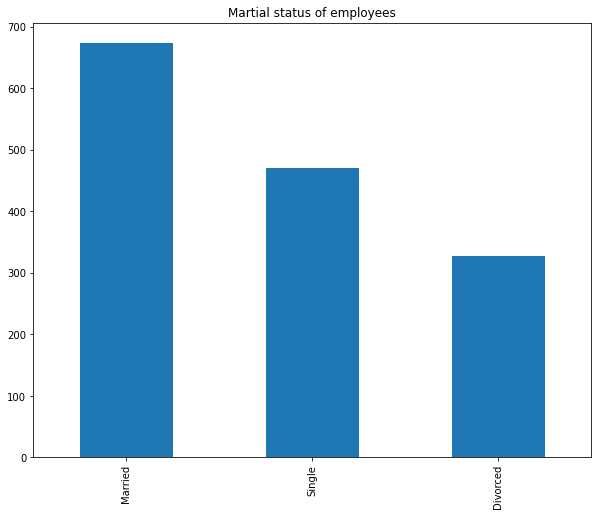

In [67]:
#explore data for martial status
plt.figure(figsize=(10,8))
ibm_data.MaritalStatus.value_counts().plot(kind='bar', alpha=1)
plt.title('Martial status of employees')
plt.show()

In [68]:
ibm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [69]:
ibm_data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [70]:
ibm_data['Attrition'].replace('Yes', 1, inplace=True)
ibm_data['Attrition'].replace('No', 0, inplace=True)

In [71]:
ibm_data

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,0,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,1,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,0,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,0,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,0,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,0,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,0,Sales,2,3,Medical,4,2,Married,5390,2,2,9


In [72]:
#slicing target
target=ibm_data['Attrition']
feature=ibm_data.drop(['Attrition'], axis=1)
target

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [73]:
ibm_data['EducationField'].dtype

dtype('O')

In [74]:
ibm_data['EducationField']=ibm_data['EducationField'].astype('category')
ibm_data['EducationField'].dtype

CategoricalDtype(categories=['Human Resources', 'Life Sciences', 'Marketing', 'Medical',
                  'Other', 'Technical Degree'],
, ordered=False)

In [75]:
ibm_data['EducationField']=ibm_data['EducationField'].cat.codes
ibm_data.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,Sales,1,2,1,2,4,Single,5993,8,1,6
1,49,0,Research & Development,8,1,1,3,2,Married,5130,1,3,10
2,37,1,Research & Development,2,2,4,4,3,Single,2090,6,3,0
3,33,0,Research & Development,3,4,1,4,3,Married,2909,1,3,8
4,27,0,Research & Development,2,1,3,1,2,Married,3468,9,3,2


In [76]:
ibm_data['EducationField'].value_counts()

1    606
3    464
2    159
5    132
4     82
0     27
Name: EducationField, dtype: int64

In [77]:
ibm_data['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [78]:
ibm_data['Department']=ibm_data['Department'].astype('category')
ibm_data['Department']=ibm_data['Department'].cat.codes
ibm_data['Department'].value_counts()

1    961
2    446
0     63
Name: Department, dtype: int64

In [79]:
ibm_data['MaritalStatus']=ibm_data['MaritalStatus'].astype('category')
ibm_data['MaritalStatus']=ibm_data['MaritalStatus'].cat.codes
ibm_data['MaritalStatus'].value_counts()

1    673
2    470
0    327
Name: MaritalStatus, dtype: int64

In [80]:
ibm_data.dtypes

Age                        int64
Attrition                  int64
Department                  int8
DistanceFromHome           int64
Education                  int64
EducationField              int8
EnvironmentSatisfaction    int64
JobSatisfaction            int64
MaritalStatus               int8
MonthlyIncome              int64
NumCompaniesWorked         int64
WorkLifeBalance            int64
YearsAtCompany             int64
dtype: object

In [81]:
x=ibm_data
y=ibm_data['Attrition']

In [82]:
x.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [83]:
y,x=dmatrices('Attrition~ Age + Department/ DistanceFromHome + Education + EducationField + YearsAtCompany', ibm_data, return_type="dataframe")
x.columns

Index(['Intercept', 'Age', 'Department', 'Department:DistanceFromHome',
       'Education', 'EducationField', 'YearsAtCompany'],
      dtype='object')

In [84]:
y=np.ravel(y)

In [85]:
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression()
logreg.fit(x,y)

LogisticRegression()

In [86]:
#checking score
logreg.score(x,y)

0.8387755102040816

In [94]:
y.mean()

0.16122448979591836

In [95]:
#creating model with trian and test
X_train,X_test, y_train,y_test= sklearn.model_selection.train_test_split(x,y , test_size=0.3, random_state=0)
model2=LogisticRegression()
model2.fit(X_train,y_train)

LogisticRegression()

In [96]:
predict= model2.predict(X_test)
predict

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [97]:
probs= model2.predict_proba(X_test)
probs

array([[0.83987194, 0.16012806],
       [0.80804494, 0.19195506],
       [0.74504046, 0.25495954],
       [0.88268348, 0.11731652],
       [0.73506448, 0.26493552],
       [0.76774127, 0.23225873],
       [0.83020367, 0.16979633],
       [0.8621706 , 0.1378294 ],
       [0.958263  , 0.041737  ],
       [0.92928206, 0.07071794],
       [0.95138793, 0.04861207],
       [0.83798113, 0.16201887],
       [0.83541258, 0.16458742],
       [0.83721804, 0.16278196],
       [0.88906619, 0.11093381],
       [0.86480604, 0.13519396],
       [0.86272335, 0.13727665],
       [0.74969565, 0.25030435],
       [0.84323484, 0.15676516],
       [0.90688753, 0.09311247],
       [0.67697273, 0.32302727],
       [0.94009947, 0.05990053],
       [0.85007292, 0.14992708],
       [0.80675933, 0.19324067],
       [0.60842909, 0.39157091],
       [0.84261441, 0.15738559],
       [0.91722779, 0.08277221],
       [0.91639073, 0.08360927],
       [0.6500218 , 0.3499782 ],
       [0.87484462, 0.12515538],
       [0.

In [98]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,predict))
print(metrics.roc_auc_score(y_test,probs[:,1]))

0.8412698412698413
0.6581440123219099


In [100]:
print(metrics.confusion_matrix(y_test,predict))
print(metrics.classification_report(y_test,predict, zero_division=1))

[[371   0]
 [ 70   0]]
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       371
         1.0       1.00      0.00      0.00        70

    accuracy                           0.84       441
   macro avg       0.92      0.50      0.46       441
weighted avg       0.87      0.84      0.77       441



In [104]:
print(y_train[0:30])
print(predict[0:30])

[0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


# our logistic regression model is accurate with 84% 